# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559707 sha256=98bc39195070cd6f224addc896e79cd9841feaf106491551faa556eccdc30da1
  Stored in directory: c:\users\ayala\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

650

In [18]:
cities

['isangel',
 'tonstad',
 'coquimbo',
 'hermanus',
 'sentyabrskiy',
 'new norfolk',
 'inuvik',
 'nizhniy baskunchak',
 'palmital',
 'kapaa',
 'moroni',
 'nanortalik',
 'tazmalt',
 'yellowknife',
 'victoria',
 'cape town',
 'illoqqortoormiut',
 'taolanaro',
 'gamba',
 'lagoa santa',
 'altus',
 'mabaruma',
 'ponta do sol',
 'thompson',
 'narsaq',
 'san luis',
 'saint-philippe',
 'nikolskoye',
 'busselton',
 'bengkulu',
 'vestmannaeyjar',
 'ushuaia',
 'tasiilaq',
 'bredasdorp',
 'vaini',
 'albany',
 'epiniana',
 'pipri',
 'mataura',
 'college',
 'kununurra',
 'cherskiy',
 'krasnyy yar',
 'castro',
 'tapaua',
 'punta arenas',
 'port alfred',
 'lata',
 'katangli',
 'eureka',
 'san patricio',
 'victor harbor',
 'ribeira grande',
 'rutana',
 'mahebourg',
 'baykit',
 'keti bandar',
 'honiara',
 'khanu woralaksaburi',
 'south shields',
 'merauke',
 'grand river south east',
 'nantucket',
 'cockburn town',
 'khatanga',
 'balikpapan',
 'maldonado',
 'san policarpo',
 'calabozo',
 'cap malheureux',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
# Create URL
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
# Creating response example to input in Loop
response = requests.get(f'{url}&q={city}').json()
response

{'coord': {'lon': -80.9, 'lat': -2.23},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 69.82,
  'feels_like': 69.39,
  'temp_min': 69.82,
  'temp_max': 69.82,
  'pressure': 1013,
  'humidity': 87,
  'sea_level': 1013,
  'grnd_level': 1009},
 'visibility': 10000,
 'wind': {'speed': 10.76, 'deg': 240},
 'clouds': {'all': 100},
 'dt': 1603763982,
 'sys': {'country': 'EC', 'sunrise': 1603710118, 'sunset': 1603753968},
 'timezone': -18000,
 'id': 3655131,
 'name': 'La Libertad',
 'cod': 200}

In [33]:
# Create lists 
City_Name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

# Creating counter for Record #
Record = 1

# Creating String
print(f'Beginning Data Retrieval')
print(f'-----------------------------')

# Loop throught the cities in list
for city in cities:
    try:
        response = requests.get(f'{url}&q={city}').json()
        City_Name.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity']) 
        Lat.append(response['coord']['lat']) 
        Lng.append(response['coord']['lon']) 
        Max_Temp.append(response['main']['temp_max']) 
        Wind_Speed.append(response['wind']['speed'])
        Name = response['name']
        
# Print 
        print(f'Processing Record {Record} of Set 1 | {Name}')

# Increase Record #
        Record  = Record + 1
      
# Skip record if not found in data
    except:
              print('City not found. Skipping...')
    continue


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | Isangel
Processing Record 2 of Set 1 | Tonstad
Processing Record 3 of Set 1 | Coquimbo
Processing Record 4 of Set 1 | Hermanus
City not found. Skipping...
Processing Record 5 of Set 1 | New Norfolk
Processing Record 6 of Set 1 | Inuvik
Processing Record 7 of Set 1 | Nizhniy Baskunchak
Processing Record 8 of Set 1 | Palmital
Processing Record 9 of Set 1 | Kapaa
Processing Record 10 of Set 1 | Moroni
Processing Record 11 of Set 1 | Nanortalik
Processing Record 12 of Set 1 | Tazmalt
Processing Record 13 of Set 1 | Yellowknife
Processing Record 14 of Set 1 | Hong Kong
Processing Record 15 of Set 1 | Cape Town
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | Gamba
Processing Record 17 of Set 1 | Lagoa Santa
Processing Record 18 of Set 1 | Altus
Processing Record 19 of Set 1 | Mabaruma
Processing Record 20 of Set 1 | Ponta do Sol
Processing Record 21 of Set 1 | Thompso

Processing Record 186 of Set 1 | Arteaga
Processing Record 187 of Set 1 | Wiwilí
City not found. Skipping...
City not found. Skipping...
Processing Record 188 of Set 1 | Aden
Processing Record 189 of Set 1 | East London
Processing Record 190 of Set 1 | Palm Coast
Processing Record 191 of Set 1 | Albertville
Processing Record 192 of Set 1 | Iquitos
City not found. Skipping...
Processing Record 193 of Set 1 | Saint-Augustin
Processing Record 194 of Set 1 | Acajutla
Processing Record 195 of Set 1 | Tyumentsevo
Processing Record 196 of Set 1 | Vila Franca do Campo
Processing Record 197 of Set 1 | Carutapera
Processing Record 198 of Set 1 | Centenário do Sul
Processing Record 199 of Set 1 | Upernavik
City not found. Skipping...
Processing Record 200 of Set 1 | Moose Factory
Processing Record 201 of Set 1 | San Quintín
Processing Record 202 of Set 1 | Tianpeng
Processing Record 203 of Set 1 | Mount Gambier
Processing Record 204 of Set 1 | Kotel
Processing Record 205 of Set 1 | Broome
Process

Processing Record 366 of Set 1 | Sterling
Processing Record 367 of Set 1 | Balabac
Processing Record 368 of Set 1 | Eyl
Processing Record 369 of Set 1 | Qaqortoq
Processing Record 370 of Set 1 | Chadiza
Processing Record 371 of Set 1 | Dinguiraye
Processing Record 372 of Set 1 | Poum
Processing Record 373 of Set 1 | Marsá Maţrūḩ
Processing Record 374 of Set 1 | Mayor Pablo Lagerenza
Processing Record 375 of Set 1 | Leningradskiy
Processing Record 376 of Set 1 | Rio Grande
Processing Record 377 of Set 1 | São João da Barra
Processing Record 378 of Set 1 | Zhirnovsk
City not found. Skipping...
Processing Record 379 of Set 1 | Petropavlovsk-Kamchatskiy
Processing Record 380 of Set 1 | Kemijärvi
Processing Record 381 of Set 1 | Lékoni
Processing Record 382 of Set 1 | Omboué
Processing Record 383 of Set 1 | Aksha
Processing Record 384 of Set 1 | Cooma
Processing Record 385 of Set 1 | Kahului
Processing Record 386 of Set 1 | Chicama
City not found. Skipping...
City not found. Skipping...
Pro

Processing Record 550 of Set 1 | Chiredzi
City not found. Skipping...
Processing Record 551 of Set 1 | Seoni
Processing Record 552 of Set 1 | Médéa
Processing Record 553 of Set 1 | Naliya
Processing Record 554 of Set 1 | High Level
Processing Record 555 of Set 1 | Waddān
Processing Record 556 of Set 1 | Bozeman
Processing Record 557 of Set 1 | Salina
Processing Record 558 of Set 1 | Chapais
Processing Record 559 of Set 1 | Maceió
Processing Record 560 of Set 1 | Sinnamary
Processing Record 561 of Set 1 | Forssa
Processing Record 562 of Set 1 | Tegul'det
Processing Record 563 of Set 1 | Kashgar
Processing Record 564 of Set 1 | Pangai
Processing Record 565 of Set 1 | Dolores
Processing Record 566 of Set 1 | Alyangula
Processing Record 567 of Set 1 | Moree
Processing Record 568 of Set 1 | Flin Flon
Processing Record 569 of Set 1 | Killorglin
Processing Record 570 of Set 1 | Fairbanks
Processing Record 571 of Set 1 | Jatiroto
Processing Record 572 of Set 1 | Mahibadhoo
Processing Record 57

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
# Creating a DataFrame
# Create a Dictionary
weather_dict = {
    'City':City_Name,
    'Cloudiness':Cloudiness,
    'Country':Country,
    'Date':Date,
    'Humidity':Humidity,
    'Latitude':Lat,
    'Longitude':Lng,
    'Max Temperature':Max_Temp,
    'Wind Speed':Wind_Speed
}
# Create DataFrame
weather_df = pd.DataFrame(weather_dict)

# Exportind Data to CSV
weather_df.to_csv('Output CSVs/weather_df.csv')
# Display count of items in DF
weather_df.count()

City               604
Cloudiness         604
Country            604
Date               604
Humidity           604
Latitude           604
Longitude          604
Max Temperature    604
Wind Speed         604
dtype: int64

In [38]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Isangel,75,VU,1603763983,58,-19.55,169.27,84.20,9.17
1,Tonstad,83,NO,1603763983,84,58.66,6.72,46.99,3.00
2,Coquimbo,0,CL,1603763962,87,-29.95,-71.34,53.60,3.36
3,Hermanus,0,ZA,1603763984,85,-34.42,19.23,62.01,3.00
4,New Norfolk,88,AU,1603763984,49,-42.78,147.06,59.00,3.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

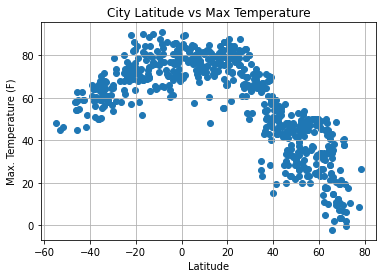

In [39]:
# Plot Scatter
plt.scatter(weather_df['Latitude'],weather_df['Max Temperature'])
plt.title('City Latitude vs Max Temperature')
plt.ylabel('Max. Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the File
plt.savefig('Output Plots/LatitudeVSMTemp')

plt.show()

#### Latitude vs. Humidity Plot

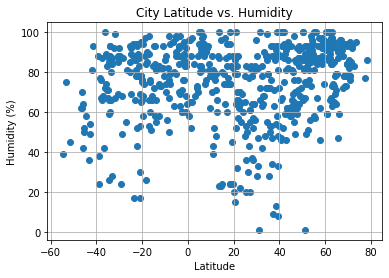

In [40]:
# Plot Scatter
plt.scatter(weather_df['Latitude'],weather_df['Humidity'])
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the File
plt.savefig('Output Plots/LatitudeVSHumidity')

plt.show()

#### Latitude vs. Cloudiness Plot

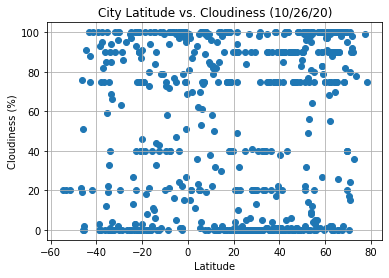

In [41]:
# Plot Scatter
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'])
plt.title('City Latitude vs. Cloudiness (10/26/20)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the File
plt.savefig('Output Plots/LatitudeVSCloudiness')

plt.show()

#### Latitude vs. Wind Speed Plot

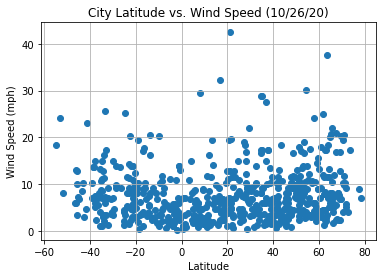

In [42]:
# Plot Scatter
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'])
plt.title('City Latitude vs. Wind Speed (10/26/20)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the File
plt.savefig('Output Plots/LatitudeVSWindSpeed')

plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [59]:
# Create Northern and Southern Hemisphere DataFrames
# Creating Data Frames
NH_df = pd.DataFrame(weather_df)
SH_df = pd.DataFrame(weather_df)
# Filtering Data Frames
NH_df = NH_df[~(NH_df['Longitude'] < 0)]
SH_df = SH_df[~(SH_df['Longitude'] > 0)]


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
2,Coquimbo,0,CL,1603763962,87,-29.95,-71.34,53.60,3.36
5,Inuvik,75,CA,1603763984,78,68.35,-133.72,12.20,8.05
7,Palmital,100,BR,1603763985,86,-22.79,-50.22,71.17,5.12
8,Kapaa,90,US,1603763919,88,22.08,-159.32,71.60,11.41
10,Nanortalik,97,GL,1603763986,91,60.14,-45.24,33.01,13.20
...,...,...,...,...,...,...,...,...,...
596,Cancún,90,MX,1603764023,100,21.17,-86.85,80.60,42.50
597,Mali,0,GN,1603764237,48,12.08,-12.30,60.53,1.97
598,Kailua,75,US,1603764237,70,21.40,-157.74,84.20,4.70
602,Little Current,75,CA,1603764238,69,45.98,-81.92,35.60,6.93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

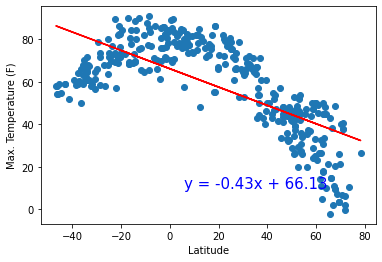

In [76]:
# Defining Values
x_values = NH_df['Latitude']
y_values = NH_df['Max Temperature']
# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')


# Save the File
plt.savefig('Output Plots/MaxTempNH')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

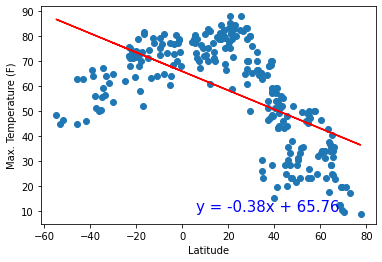

In [77]:
# Defining Values
x_values = SH_df['Latitude']
y_values = SH_df['Max Temperature']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature (F)')


# Save the File
plt.savefig('Output Plots/MaxTempSH')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

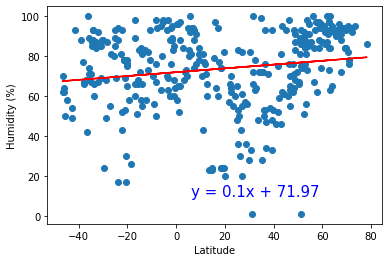

In [78]:
# Defining Values
x_values = NH_df['Latitude']
y_values = NH_df['Humidity']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the File
plt.savefig('Output Plots/HumidityNH')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

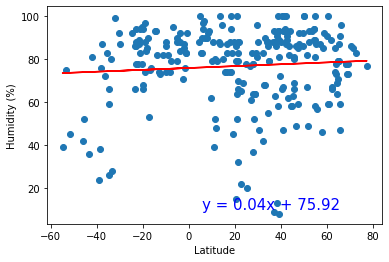

In [79]:
# Defining Values
x_values = SH_df['Latitude']
y_values = SH_df['Humidity']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')


# Save the File
plt.savefig('Output Plots/HumiditySH')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

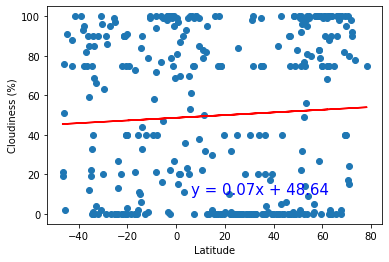

In [80]:
# Defining Values
x_values = NH_df['Latitude']
y_values = NH_df['Cloudiness']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the File
plt.savefig('Output Plots/CloudinessNH')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

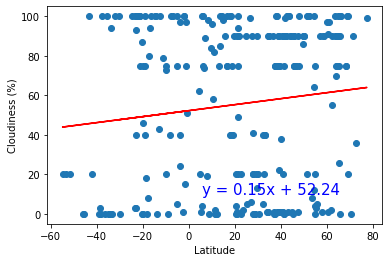

In [81]:
# Defining Values
x_values = SH_df['Latitude']
y_values = SH_df['Cloudiness']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')


# Save the File
plt.savefig('Output Plots/CloudinessSH')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

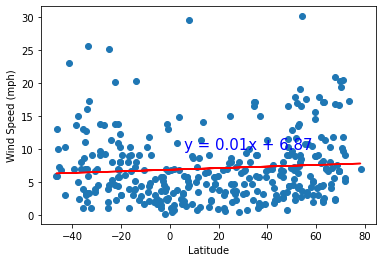

In [82]:
# Defining Values
x_values = NH_df['Latitude']
y_values = NH_df['Wind Speed']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


# Save the File
plt.savefig('Output Plots/WindSpeedNH')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

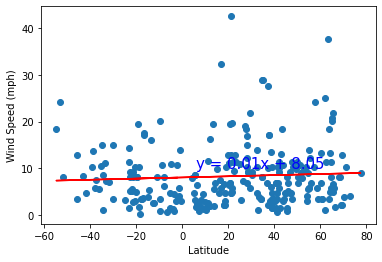

In [83]:
# Defining Values
x_values = SH_df['Latitude']
y_values = SH_df['Wind Speed']

# Ploting Scatter with Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')


# Save the File
plt.savefig('Output Plots/WindSpeedSH')

plt.show()